In [0]:
import os
import json
import numpy as np

## Load Data

In [0]:
def load_data(link):
  
  text = []
  sentiment = []

  for filename in os.listdir(link):
    if filename != '.ipynb_checkpoints':
      file_path = os.path.join(link, filename)
      with open(file_path, encoding = 'unicode_escape') as f:
        dic = json.load(f)

        for k, v in dic['text'].items():
          text.append(v)
        for k, v in dic['sentiment'].items():
          sentiment.append(v)
  return text, sentiment

def preprocess_data(text, sentiment):
  combo = [list(i) for i in zip(text, sentiment)]
  x = []
  y = []
  
  for line in combo:
    x.append(line[0])
    if line[1] in ['Positive', 'positive', 'postive']:
      y.append(2)
    elif line[1] in ['Neutral', 'neutral', 'neutra', 'neutra;', 'Neural']:
      y.append(1)
    elif line[1] in ['Negative', 'negative', 'Negetive']:
      y.append(0)
    else:
      print('error in sentiment label {}'.format(line[1]))

  return x, y

In [0]:
link = 'drive/INFO7374_NeuralNetwork&AI/Assignment_3/updated-json-files'
text, sentiment = load_data(link)
texts, labels = preprocess_data(text, sentiment)

In [0]:
len(texts), len(labels)

(1644, 1644)

## Call IBM NLP API

In [0]:
pip install --upgrade watson-developer-cloud

    100% |████████████████████████████████| 286kB 8.9MB/s 
    100% |████████████████████████████████| 204kB 29.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/f3/1d/4f/5a5432c03a3c28c79e41bbf7110b871a88bab10393906b86fe
Successfully built watson-developer-cloud


In [0]:
from __future__ import print_function
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions

In [0]:
service = NaturalLanguageUnderstandingV1(
    version='2018-03-16',
    url='https://gateway-wdc.watsonplatform.net/natural-language-understanding/api',
    iam_apikey='SsmrldZ0rxX1_L_a9zq30rtpSTlGm0dMGu6TvhSjzpmg')

In [0]:
def sentiment_analysis(texts):
  label = []
  score = []
  for i in range(len(texts)):
    try:
      response = service.analyze(
                 text = texts[i],
                 features=Features(entities=EntitiesOptions(sentiment = True,  limit = 1))).get_result()
      if response['entities']:
        label.append(response['entities'][0]['sentiment']['label'])
        score.append(response['entities'][0]['sentiment']['score'])
      else:
        label.append('NA')
        score.append('NA')
    except:
      label.append('NA')
      score.append('NA')
#       print('error with: No. {} text {}'.format(i, texts[i]))

  return label, score

In [0]:
pred, score = sentiment_analysis(texts)

In [0]:
import pandas as pd

ibm = {
         'text': texts,
         'predict': pred,
         'score': score,
         'label': labels
      }

df_ibm = pd.DataFrame.from_dict(ibm)
df_ibm.to_csv('ibm_result.csv')

In [0]:
index = list(p != 'NA' for p in pred)

In [0]:
y_pred = np.array(pred)[index]
y_actual = np.array(labels)[index]

In [0]:
my_dict = {'positive':2, 'neutral':1, 'negative': 0}
y_pred = np.vectorize(my_dict.get)(y_pred)

In [0]:
len(y_pred), len(y_actual)

(962, 962)

In [0]:
acc = len(y_actual[y_actual == y_pred])/len(y_actual)

Accuracy with IBM Watson API is 0.47401247401247404


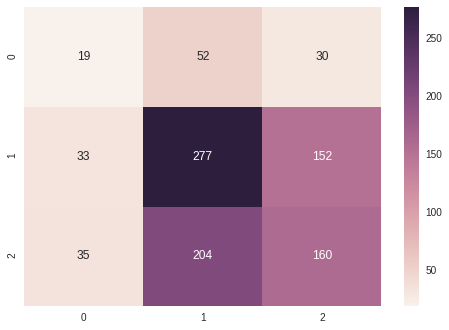

In [0]:
import seaborn as sns
from sklearn import metrics

print('Accuracy with IBM Watson API is {}'.format(acc))

matrix = metrics.confusion_matrix(y_actual, y_pred)

sns.heatmap(matrix,annot=True,fmt='.5g')